## Imports

In [75]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense

In [14]:
print('tf.keras_version=',tf.keras.__version__, 'keras_version=',keras.__version__)

tf.keras_version= 3.9.2 keras_version= 3.9.2


## Data prep

In [15]:
from keras import datasets
house_data = keras.datasets.boston_housing

In [17]:
(X_train, y_train), (X_test, y_test) = house_data.load_data()   

In [18]:
X_train.shape

(404, 13)

In [19]:
X_test.shape

(102, 13)

In [20]:
house_data.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [21]:
y_train.shape

(404,)

## Data Visualization

In [22]:
Feature_names  = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']

df_train=pd.DataFrame(np.column_stack((X_train, y_train)), columns=Feature_names)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


## Data split

In [23]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [25]:
X_test.shape

(51, 13)

In [26]:
X_val.shape

(51, 13)

## NNA architecture

In [ ]:
from tensorflow.keras import Sequential
network = Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 30)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

## NNA components

In [66]:
network.layers

[<Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>]

In [67]:
hidden1=network.layers[1]

In [68]:
weights,biases=hidden1.get_weights()

In [69]:
weights

array([[-3.86692971e-01, -1.33605003e-01, -4.59961593e-02,
        -2.19021559e-01,  1.68083906e-02, -3.23262185e-01,
        -8.31393600e-02,  2.70677805e-01, -1.97301835e-01,
         7.22610056e-02],
       [ 1.26099706e-01,  1.94709063e-01, -7.31769204e-03,
         1.52429163e-01, -3.17626178e-01,  1.65857315e-01,
         9.19942260e-02,  1.90650105e-01, -3.70886266e-01,
        -8.97793770e-02],
       [-1.02012277e-01, -5.35601079e-02,  1.48048997e-01,
        -1.66617632e-02, -1.23033941e-01,  3.16525400e-01,
        -2.35739946e-02, -3.34210366e-01,  1.52052522e-01,
         3.74503672e-01],
       [ 1.33496583e-01, -3.34691644e-01, -1.79172799e-01,
         3.52240145e-01,  2.19358981e-01,  1.65328681e-01,
        -3.14523935e-01, -4.04236615e-02, -8.37547183e-02,
        -1.80520579e-01],
       [-1.49766386e-01, -2.69546866e-01, -5.83026409e-02,
        -5.45504391e-02, -3.93228829e-02,  1.85775399e-01,
         9.87569690e-02,  2.13434041e-01, -3.45141113e-01,
         1.

In [70]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# NNA config

In [71]:
network.compile(loss='mean_squared_error',optimizer='sgd')

In [72]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

In [73]:
history=network.fit(X_train_prep,y_train,
                    epochs=30,
                    validation_data=(X_val_prep,y_val))

Epoch 1/30


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 438.1926 - val_loss: 55.1541
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.8571 - val_loss: 130.6376
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.3083 - val_loss: 43.2972
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.1524 - val_loss: 58.0361
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.2093 - val_loss: 69.9778
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.5941 - val_loss: 80.9760
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.2200 - val_loss: 52.1145
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.7959 - val_loss: 40.5086
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1098 - val_loss: 45.6066
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2371 - val_loss: 35.3881
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.6604 - val_loss: 47.4604
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

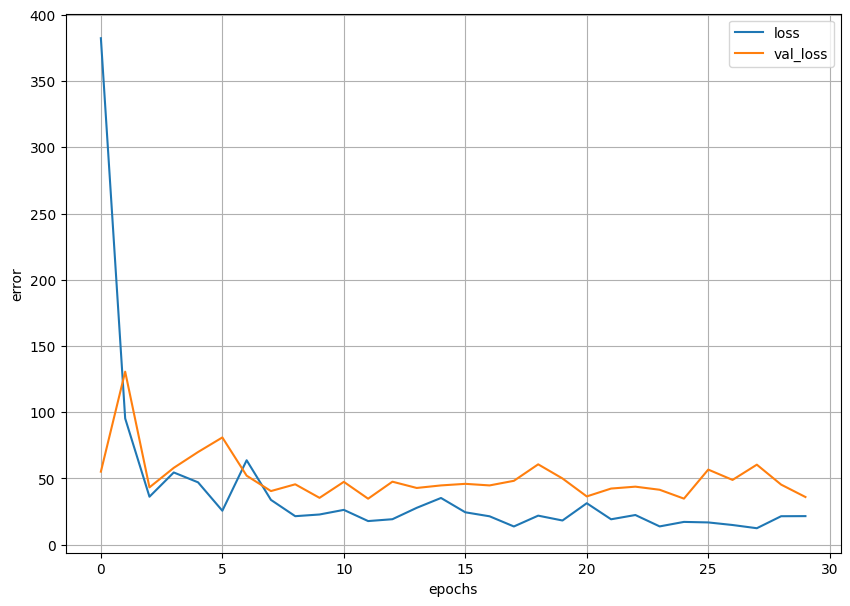

In [74]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid(True)
plt.show()

## Prediction

In [76]:
X_new=X_test[30]

In [77]:
df_new=pd.DataFrame([X_new],columns=Feature_names[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [79]:
X_new_prep=scaler.transform(df_new)

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [80]:
y_predict=network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [81]:
y_predict.round(2)

array([[23.32]], dtype=float32)

In [82]:
print('Prediction:',y_predict.round(2))
print('Real value:',y_test[30])

Prediction: [[23.32]]
Real value: 21.6


## Save Model

In [83]:
network.save('../models/boston_housing_model.keras')